<a href="https://colab.research.google.com/github/viniciusrpb/sibgrapi2015_algasegmentation_levelset/blob/master/bear_keras_cnnmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [4]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 14.9 MB/s 


In [5]:
!cp -r "/content/drive/My Drive/bears_2/bears_validation" "bears_validation_2"
!cp -r "/content/drive/My Drive/bears_2/bears_train" "bears_train_2"
!cp -r "/content/drive/My Drive/bears_3/bears_validation" "bears_validation_3"
!cp -r "/content/drive/My Drive/bears_3/bears_train" "bears_train_3"

In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,GlobalAveragePooling2D ,MaxPooling2D,Activation,Flatten,Conv2D,BatchNormalization,Dropout
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow_addons as tfa

In [7]:
path_train = 'bears_train_2'
path_validation = 'bears_validation_2'
path_test = 'bears_validation_2'

# Pretrained GoogLeNet model using ImageNet


In [46]:
#from tf.keras.applications.MobileNetV2 import MobileNetV2

pre_trained_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

Hyperparameters

In [47]:
batch_size = 16
epochs=10

### Data augmentation

In [48]:
train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

Read the images

In [49]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(path_train,
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  validation_datagen.flow_from_directory( path_validation,
                                                          batch_size  = batch_size,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

test_generator =  test_datagen.flow_from_directory( path_test,
                                                          batch_size  = batch_size,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

Found 232 images belonging to 2 classes.
Found 52 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


Hyper-parameters

In [50]:
number_of_neurons = 100
number_of_classes = validation_generator.class_indices

Lets see some samples

In [51]:
model = Sequential()

model.add(pre_trained_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())

model.add(Dense(number_of_neurons))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(2))

model.add(Activation("softmax"))

In [52]:
sgd = SGD(learning_rate=0.0001,decay=1e-6, momentum=0.9, nesterov=True)

#f1_score = tfa.metrics.F1Score(num_classes=2, average='micro',threshold=0.5)

model.compile(optimizer = sgd, 
              loss = 'categorical_crossentropy', 
              metrics = 'accuracy')
            #metrics = ['accuracy',f1_score])

#model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.000001,decay=0.01), 
#              loss = 'categorical_crossentropy', 
#              metrics = 'accuracy')
            #metrics = ['accuracy',f1_score])

In [53]:
history_fine = model.fit(train_generator,
                         epochs=epochs,
                         validation_data=validation_generator
                         #initial_epoch=history.epoch[-1],
                         )

Epoch 1/10
15/15 [==============================] - 12s 661ms/step - loss: 0.8727 - accuracy: 0.5216 - val_loss: 0.6598 - val_accuracy: 0.5385
Epoch 2/10
15/15 [==============================] - 8s 546ms/step - loss: 0.6328 - accuracy: 0.6810 - val_loss: 0.4931 - val_accuracy: 0.8846
Epoch 3/10
15/15 [==============================] - 8s 554ms/step - loss: 0.5348 - accuracy: 0.7112 - val_loss: 0.4153 - val_accuracy: 0.9423
Epoch 4/10
15/15 [==============================] - 8s 531ms/step - loss: 0.4566 - accuracy: 0.8276 - val_loss: 0.3625 - val_accuracy: 0.9423
Epoch 5/10
15/15 [==============================] - 8s 555ms/step - loss: 0.4062 - accuracy: 0.8664 - val_loss: 0.3199 - val_accuracy: 0.9615
Epoch 6/10
15/15 [==============================] - 8s 551ms/step - loss: 0.3525 - accuracy: 0.9095 - val_loss: 0.2904 - val_accuracy: 0.9615
Epoch 7/10
15/15 [==============================] - 8s 542ms/step - loss: 0.3577 - accuracy: 0.8750 - val_loss: 0.2667 - val_accuracy: 0.9808
Epoch

In [ ]:
#f1 = history_fine.history['f1_score']
#val_f1 = history_fine.history['val_f1_score']

#plt.figure(figsize=(8, 8))
#plt.subplot(2, 1, 1)
#plt.plot(f1, label='Training F1-Score')
#plt.plot(val_f1, label='Validation F1-Score')
#plt.legend(loc='lower right')
#plt.ylabel('F1-Score')
#plt.ylim([min(plt.ylim()),1])
#plt.title('Training and Validation F1-Score')


Text(0.5, 1.0, 'Training and Validation F1-Score')

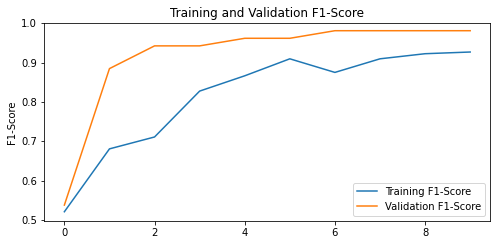

In [54]:
f1 = history_fine.history['accuracy']
val_f1 = history_fine.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(f1, label='Training F1-Score')
plt.plot(val_f1, label='Validation F1-Score')
plt.legend(loc='lower right')
plt.ylabel('F1-Score')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation F1-Score')


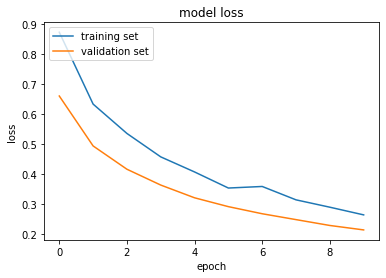

In [55]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper left')
plt.show()

In [56]:
y_prob = model.predict(test_generator,batch_size=batch_size)
y_pred = np.argmax(y_prob,axis=1)

print(classification_report(y_pred,test_generator.classes))

              precision    recall  f1-score   support

           0       0.36      0.35      0.35        26
           1       0.37      0.38      0.38        26

    accuracy                           0.37        52
   macro avg       0.37      0.37      0.37        52
weighted avg       0.37      0.37      0.37        52



In [57]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [58]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0])

In [59]:
import plotly.figure_factory as ff

y_true = test_generator.classes

z = confusion_matrix(y_true, y_pred)

x = list(test_generator.class_indices.keys())

y = list(test_generator.class_indices.keys())


In [60]:
# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()